In [1]:
import matplotlib.pyplot as plt

# Create a pivot table for the stacked bar plot
pivot_table = df.pivot_table(index='dlr_application_class', columns='comment_at_start', aggfunc='size', fill_value=0)

# Plotting
pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6), cmap='viridis')
plt.title('Distribution of Comments at Start by DLR Application Class')
plt.xlabel('DLR Application Class')
plt.ylabel('Number of Repositories')
plt.legend(title='Comment at Start')
plt.show()


NameError: name 'df' is not defined

In [2]:
import pandas as pd
import numpy as np

# Sample data
data = {
    'dlr_application_class': np.random.choice([0, 1, 2], 100),
    'comment_at_start': np.random.choice(['none', 'some', 'more', 'most'], 100)
}

df = pd.DataFrame(data)


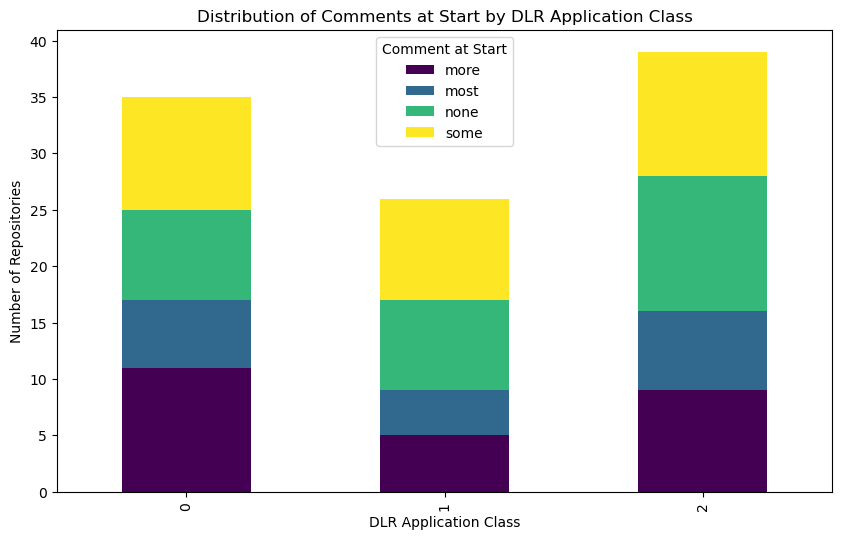

In [3]:
import matplotlib.pyplot as plt

# Create a pivot table for the stacked bar plot
pivot_table = df.pivot_table(index='dlr_application_class', columns='comment_at_start', aggfunc='size', fill_value=0)

# Plotting
pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6), cmap='viridis')
plt.title('Distribution of Comments at Start by DLR Application Class')
plt.xlabel('DLR Application Class')
plt.ylabel('Number of Repositories')
plt.legend(title='Comment at Start')
plt.show()


<Figure size 1000x600 with 0 Axes>

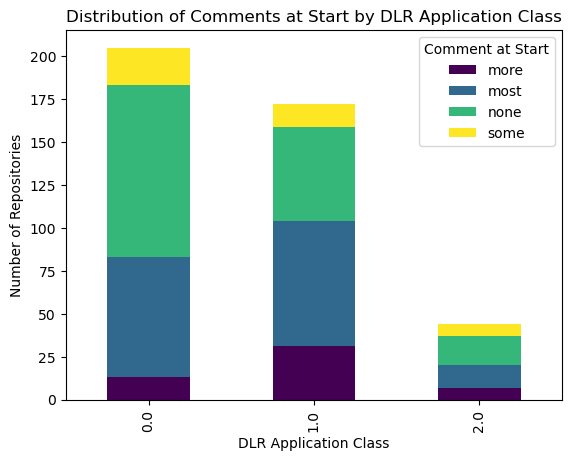

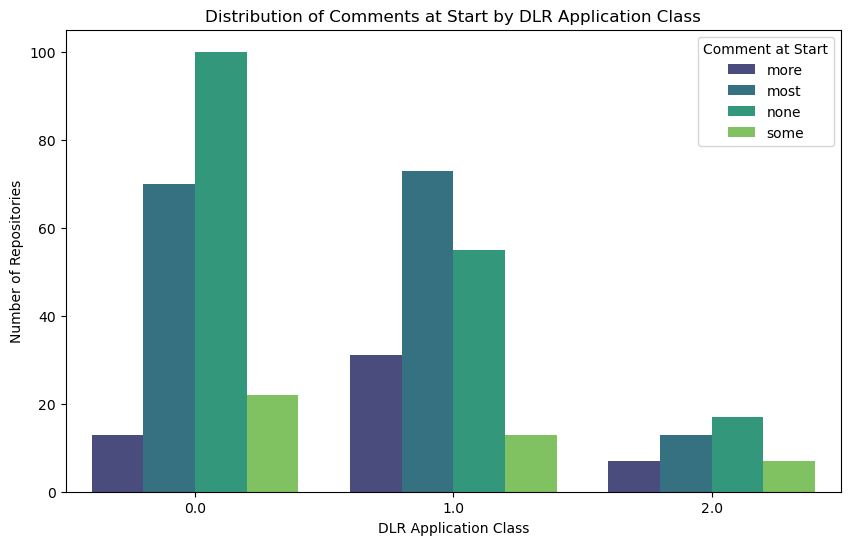

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Read Data from CSV
file_path = 'final_data_publish.csv'  # Update with the path to your CSV file
df = pd.read_csv(file_path)

# Step 2: Filter Data by Language
df = df[df['language'].isin(['Python', 'C++', 'R'])]

# Step 3: Prepare Data for Visualization
# Create a pivot table for the stacked bar plot
pivot_table = df.pivot_table(index='dlr_soft_class', columns='comment_category', aggfunc='size', fill_value=0)

# Count the occurrences of each category for the grouped bar plot
counts = df.groupby(['dlr_soft_class', 'comment_category']).size().reset_index(name='counts')

# Step 4: Create Stacked Bar Plot
plt.figure(figsize=(10, 6))
pivot_table.plot(kind='bar', stacked=True, cmap='viridis')
plt.title('Distribution of Comments at Start by DLR Application Class')
plt.xlabel('DLR Application Class')
plt.ylabel('Number of Repositories')
plt.legend(title='Comment at Start')
plt.show()

# Step 5: Create Grouped Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='dlr_soft_class', y='counts', hue='comment_category', data=counts, palette='viridis')
plt.title('Distribution of Comments at Start by DLR Application Class')
plt.xlabel('DLR Application Class')
plt.ylabel('Number of Repositories')
plt.legend(title='Comment at Start')
plt.show()


<Figure size 1000x600 with 0 Axes>

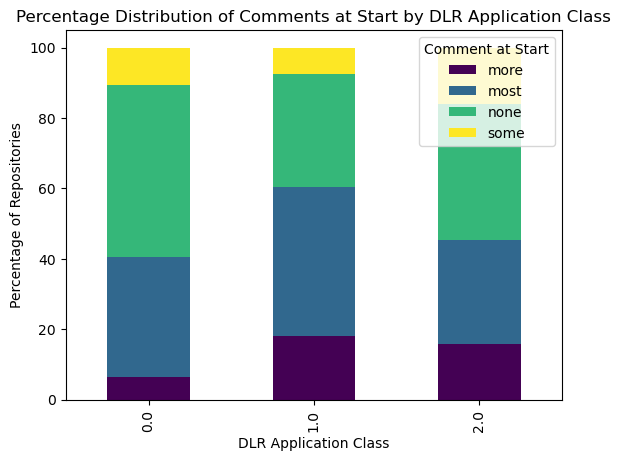

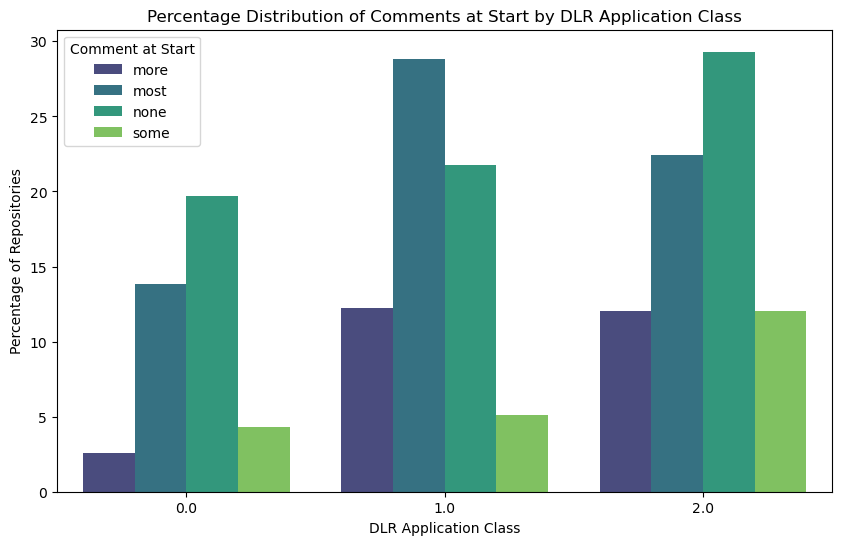

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Read Data from CSV
file_path = 'final_data_publish.csv'  # Update with the path to your CSV file
df = pd.read_csv(file_path)

# Step 2: Filter Data by Language
df = df[df['language'].isin(['Python', 'C++', 'R'])]

# Step 3: Prepare Data for Visualization
# Create a pivot table for the stacked bar plot with percentages
pivot_table = df.pivot_table(index='dlr_soft_class', columns='comment_category', aggfunc='size', fill_value=0)

# Calculate the percentage
pivot_table = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

# Count the occurrences and calculate percentages for the grouped bar plot
counts = df.groupby(['dlr_soft_class', 'comment_category']).size().reset_index(name='counts')
total_counts = df.groupby('dlr_soft_class').size().reset_index(name='total_counts')
merged_counts = pd.merge(counts, total_counts, on='dlr_soft_class')
merged_counts['percentage'] = (merged_counts['counts'] / merged_counts['total_counts']) * 100

# Step 4: Create Stacked Bar Plot
plt.figure(figsize=(10, 6))
pivot_table.plot(kind='bar', stacked=True, cmap='viridis')
plt.title('Percentage Distribution of Comments at Start by DLR Application Class')
plt.xlabel('DLR Application Class')
plt.ylabel('Percentage of Repositories')
plt.legend(title='Comment at Start')
plt.show()

# Step 5: Create Grouped Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='dlr_soft_class', y='percentage', hue='comment_category', data=merged_counts, palette='viridis')
plt.title('Percentage Distribution of Comments at Start by DLR Application Class')
plt.xlabel('DLR Application Class')
plt.ylabel('Percentage of Repositories')
plt.legend(title='Comment at Start')
plt.show()

<Figure size 1000x600 with 0 Axes>

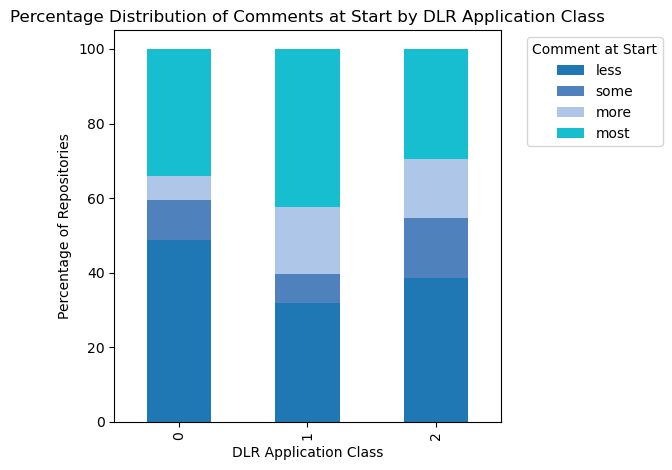

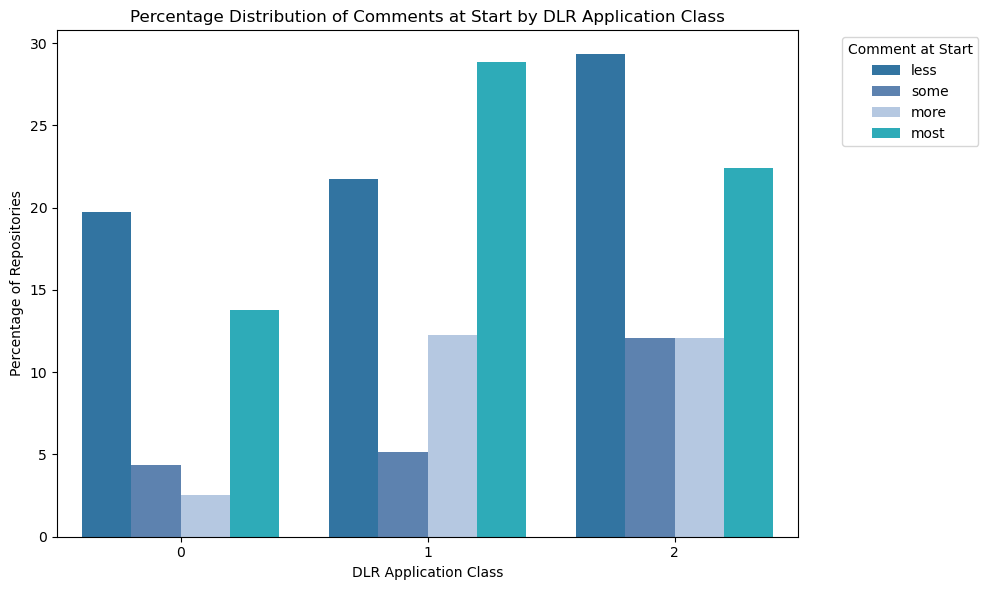

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Read Data from CSV
file_path = 'final_data_publish.csv'  # Update with the path to your CSV file
df = pd.read_csv(file_path, sep=';')

# Step 2: Filter Data by Language
df = df[df['language'].isin(['Python', 'C++', 'R'])]

# Replace 'none' with 'less' and ensure comment_at_start is a categorical type with the correct order
df['comment_category'] = df['comment_category'].replace('none', 'less')
comment_order = ['less', 'some', 'more', 'most']
df['comment_category'] = pd.Categorical(df['comment_category'], categories=comment_order, ordered=True)

# Step 3: Prepare Data for Visualization
# Create a pivot table for the stacked bar plot with percentages
pivot_table = df.pivot_table(index='dlr_soft_class', columns='comment_category', aggfunc='size', fill_value=0)

# Calculate the percentage
pivot_table = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

# Count the occurrences and calculate percentages for the grouped bar plot
counts = df.groupby(['dlr_soft_class', 'comment_category']).size().reset_index(name='counts')
total_counts = df.groupby('dlr_soft_class').size().reset_index(name='total_counts')
merged_counts = pd.merge(counts, total_counts, on='dlr_soft_class')
merged_counts['percentage'] = (merged_counts['counts'] / merged_counts['total_counts']) * 100

# Ensure the order of comment_category for plotting
merged_counts['comment_category'] = pd.Categorical(merged_counts['comment_category'], categories=comment_order, ordered=True)

# Define the custom EASST color palette
easst_palette = ['#1f77b4', '#4f81bd', '#aec7e8', '#17becf']

# Step 4: Create Stacked Bar Plot
plt.figure(figsize=(10, 6))
pivot_table.plot(kind='bar', stacked=True, color=easst_palette)
plt.title('Percentage Distribution of Comments at Start by DLR Application Class')
plt.xlabel('DLR Application Class')
plt.ylabel('Percentage of Repositories')
plt.legend(title='Comment at Start', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('stacked_bar_plot.png')  # Save the stacked bar plot
plt.show()

# Step 5: Create Grouped Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='dlr_soft_class', y='percentage', hue='comment_category', data=merged_counts, palette=easst_palette, order=[0, 1, 2])
plt.title('Percentage Distribution of Comments at Start by DLR Application Class')
plt.xlabel('DLR Application Class')
plt.ylabel('Percentage of Repositories')
plt.legend(title='Comment at Start', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('grouped_bar_plot.png')  # Save the grouped bar plot
plt.show()


<Figure size 1000x600 with 0 Axes>

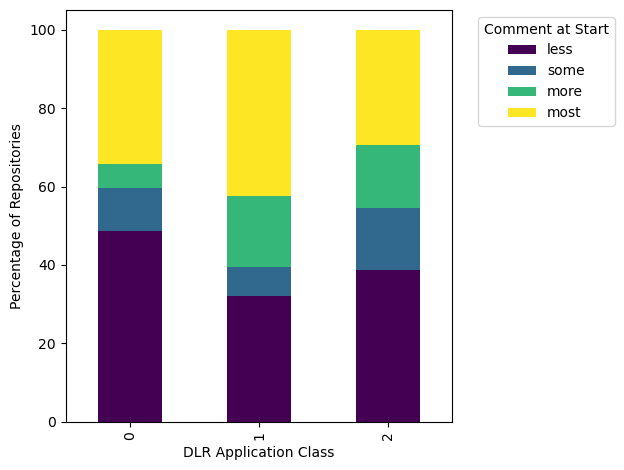

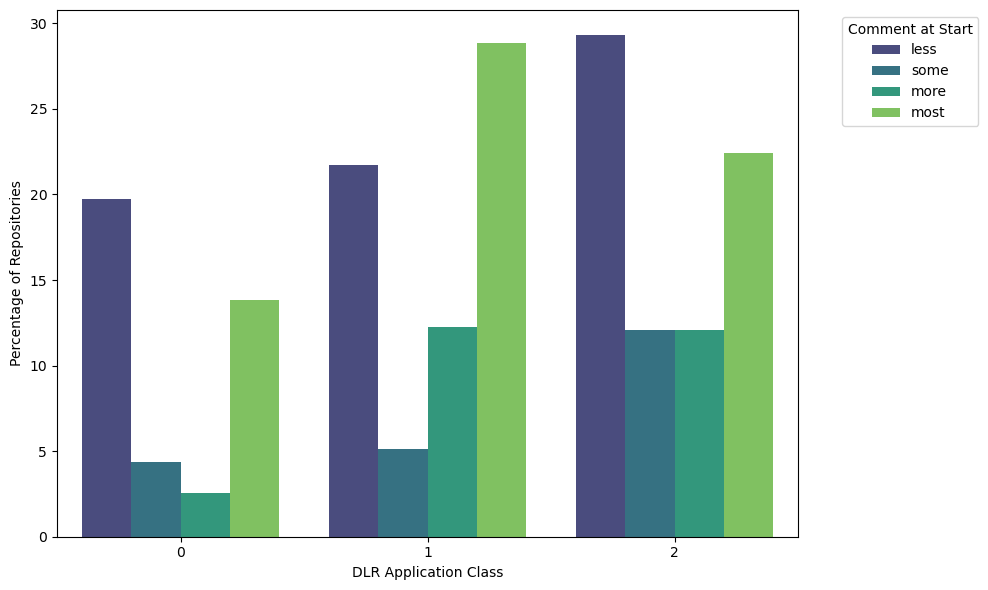

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Read Data from CSV
file_path = 'final_data_publish.csv'  # Update with the path to your CSV file
df = pd.read_csv(file_path, sep=';')

# Step 2: Filter Data by Language
df = df[df['language'].isin(['Python', 'C++', 'R'])]

# Replace 'none' with 'less' and ensure comment_at_start is a categorical type with the correct order
df['comment_category'] = df['comment_category'].replace('none', 'less')
comment_order = ['less', 'some', 'more', 'most']
df['comment_category'] = pd.Categorical(df['comment_category'], categories=comment_order, ordered=True)

# Step 3: Prepare Data for Visualization
# Create a pivot table for the stacked bar plot with percentages
pivot_table = df.pivot_table(index='dlr_soft_class', columns='comment_category', aggfunc='size', fill_value=0)

# Calculate the percentage
pivot_table = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

# Count the occurrences and calculate percentages for the grouped bar plot
counts = df.groupby(['dlr_soft_class', 'comment_category']).size().reset_index(name='counts')
total_counts = df.groupby('dlr_soft_class').size().reset_index(name='total_counts')
merged_counts = pd.merge(counts, total_counts, on='dlr_soft_class')
merged_counts['percentage'] = (merged_counts['counts'] / merged_counts['total_counts']) * 100

# Ensure the order of comment_category for plotting
merged_counts['comment_category'] = pd.Categorical(merged_counts['comment_category'], categories=comment_order, ordered=True)

# Step 4: Create Stacked Bar Plot
plt.figure(figsize=(10, 6))
pivot_table.plot(kind='bar', stacked=True, cmap='viridis')
plt.xlabel('DLR Application Class')
plt.ylabel('Percentage of Repositories')
plt.legend(title='Comment at Start', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('stacked_bar_plot_comment_at_start.png')  # Save the stacked bar plot
plt.show()

# Step 5: Create Grouped Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='dlr_soft_class', y='percentage', hue='comment_category', data=merged_counts, palette='viridis', order=[0, 1, 2])
plt.xlabel('DLR Application Class')
plt.ylabel('Percentage of Repositories')
plt.legend(title='Comment at Start', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('grouped_bar_plot_comment_at_start.png')  # Save the grouped bar plot
plt.show()
